In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [2]:

df = pd.read_csv("weatherHistory.csv")  


In [3]:
# Preprocess the data
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df.set_index('Formatted Date', inplace=True)
wind_speed = df['Wind Speed (km/h)']

/var/folders/k9/2v1n2cw97z5_1vftpp8ft2br0000gn/T/ipykernel_62010/2807001528.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


In [4]:

# Split data into train and test sets
train_size = int(len(wind_speed) * 0.8)
train, test = wind_speed[:train_size], wind_speed[train_size:]

In [5]:
# Fit SARIMA model
sarima_model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 24))
sarima_fit = sarima_model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88572D+00    |proj g|=  7.78785D-02


 This problem is unconstrained.



At iterate    5    f=  2.76161D+00    |proj g|=  1.59688D-02

At iterate   10    f=  2.74943D+00    |proj g|=  4.67845D-03

At iterate   15    f=  2.74778D+00    |proj g|=  6.46734D-03

At iterate   20    f=  2.74748D+00    |proj g|=  5.52151D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     29      1     0     0   4.391D-05   2.747D+00
  F =   2.7474789697308681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [6]:

# Make predictions with SARIMA model
sarima_predictions = sarima_fit.forecast(steps=len(test))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [7]:

# Calculate RMSE for SARIMA
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_predictions))


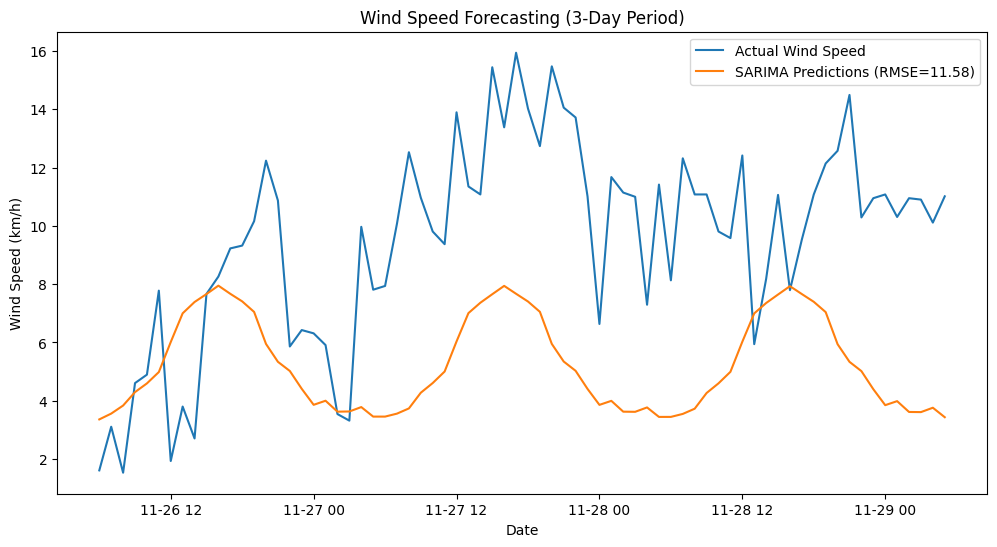

RMSE for SARIMA: 11.580844115741954


In [8]:

# Plot actual vs predicted values for 3 days
plt.figure(figsize=(12, 6))
plt.plot(test.index[:72], test.values[:72], label='Actual Wind Speed')
plt.plot(test.index[:72], sarima_predictions[:72], label='SARIMA Predictions (RMSE={:.2f})'.format(sarima_rmse))
plt.title('Wind Speed Forecasting (3-Day Period)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()

# Print RMSE for SARIMA
print("RMSE for SARIMA:", sarima_rmse)